In [4]:
import tensorflow as tf
import jax.numpy as jnp
import jax
import numpy as np

import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

batch_size = 32
learning_rate = 10e-4

# loading the dataset
ds_tr, ds_ts, ds_val = tfds.load('oxford_flowers102', split=['train', 'test', 'validation'], shuffle_files=True)

# browsing dataset
print(ds_tr.element_spec)

# set the information of dataset
ds_tr = ds_tr.prefetch(tf.data.AUTOTUNE)
ds_tr = ds_tr.shuffle(32, reshuffle_each_iteration=True)
# "batch"只能疊shape一樣的tensor。所以統一shape的map function要先做
ds_tr = ds_tr.map(lambda x: tf.image.resize_with_crop_or_pad(x['image'], 256, 256)) 
ds_tr = ds_tr.batch(32, True) 

# make the iterator
ds_tr_iter = iter(ds_tr)

ds_tr_ele = ds_tr_iter.get_next()
print(ds_tr_ele.shape)


{'file_name': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}
(32, 256, 256, 3)


2023-05-01 13:24:25.650749: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [1]
	 [[{{node Placeholder/_2}}]]
2023-05-01 13:24:25.651126: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [1]
	 [[{{node Placeholder/_3}}]]


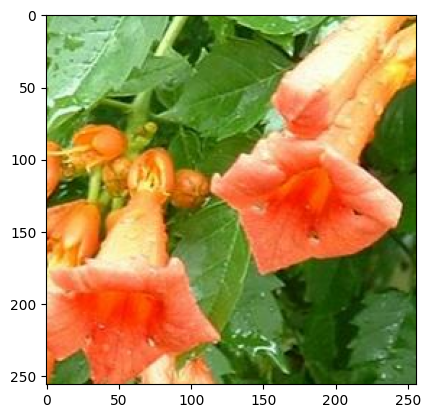

In [5]:
# showing the image
plt.imshow(ds_tr_ele[0].numpy().astype("uint8"))

In [6]:
## test the embedding and reverse the embedding
img = ds_tr_ele[0].numpy().astype("float32")
img = (img - 128.) / 256.

a = tf.random.uniform(img.shape, -1, 1)
b = tf.random.uniform(img.shape, -1, 1)

# embedding
img_em = img * a + b
img_rem = (img_em - b) / a
print(img[0])
print(img_em[0])
print(img_rem[0])

[[-0.0078125   0.20703125 -0.16015625]
 [ 0.03125     0.23828125 -0.12109375]
 [ 0.0703125   0.28125    -0.0625    ]
 [ 0.0546875   0.26953125 -0.046875  ]
 [ 0.01171875  0.234375   -0.06640625]
 [ 0.0546875   0.2734375  -0.01953125]
 [ 0.11328125  0.33203125  0.046875  ]
 [ 0.0703125   0.29296875  0.0234375 ]
 [ 0.          0.22265625 -0.04296875]
 [-0.01171875  0.20703125 -0.03125   ]
 [ 0.00390625  0.21875    -0.0078125 ]
 [ 0.078125    0.29296875  0.0703125 ]
 [ 0.0546875   0.26953125  0.0546875 ]
 [ 0.02734375  0.23828125  0.03515625]
 [ 0.01171875  0.22265625  0.01953125]
 [ 0.015625    0.2265625   0.0234375 ]
 [ 0.03125     0.2421875   0.0390625 ]
 [ 0.05078125  0.26171875  0.05859375]
 [ 0.0625      0.2734375   0.0703125 ]
 [ 0.03125     0.2421875   0.0390625 ]
 [ 0.03125     0.2421875   0.0390625 ]
 [ 0.0625      0.2734375   0.0703125 ]
 [ 0.1015625   0.31640625  0.1015625 ]
 [ 0.09375     0.30859375  0.09375   ]
 [ 0.04296875  0.2578125   0.03515625]
 [ 0.0078125   0.22265625